In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
plt.rcParams['figure.figsize'] = (15,7)
from datetime import timedelta, datetime

In [2]:
data=pd.read_csv(r"D:\marlabs\Datasets\x.csv")#olympic athlets data
data1=pd.read_csv("D:\marlabs\Datasets\y.csv")#countries data with codes


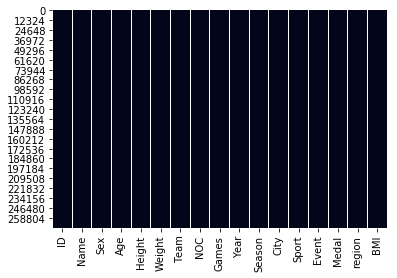

In [83]:
import seaborn as sns
sns.heatmap(df.isnull(), cbar=False)

In [3]:
df=pd.merge(data,data1,on='NOC',how='outer')

In [4]:
df=df.drop(['notes'],axis=1)

In [5]:
df=df.dropna(subset=['ID'])

In [6]:
df["Medal"].fillna("No_medal", inplace = True) 


In [7]:
df['region'] = np.where(df['region'].isnull(), df['Team'], df['region'])

In [8]:
df["Age"].fillna(df['Age'].mean(), inplace = True) 

In [9]:
#replace missing values in Height column with mean value based on Gender 
df['Height'] = df.groupby(['Sex'])['Height']\
    .transform(lambda x: x.fillna(x.mean()))

In [10]:
#replace missing values in Weight column with mean value based on Gender
df['Weight'] = df.groupby(['Sex'])['Weight']\
    .transform(lambda x: x.fillna(x.mean()))

In [50]:
df['Height']=df['Height'].astype(int)

In [12]:
df['ID']=df['ID'].astype(int)

In [13]:
df['Year']=df['Year'].astype(int)

In [14]:
df['Weight']=df['Weight'].astype(int)

In [15]:
df['Age']=df['Age'].astype(int)

In [45]:
cm_to_mtr=0.01
df['Height']*=cm_to_mtr

In [46]:
#BMI column create
df['BMI']=round(df['Weight']/(df['Height']**2))

In [48]:
cm_to_mtr=100
df['Height']*=cm_to_mtr

In [51]:
df['BMI']=df['BMI'].astype(int)

In [49]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,BMI
0,1,A Dijiang,M,24,180.0,80,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No_medal,China,25.0
1,2,A Lamusi,M,23,170.0,60,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No_medal,China,21.0
2,602,Abudoureheman,M,22,182.0,75,China,CHN,2000 Summer,2000,Summer,Sydney,Boxing,Boxing Men's Middleweight,No_medal,China,23.0
3,1463,Ai Linuer,M,25,160.0,62,China,CHN,2004 Summer,2004,Summer,Athina,Wrestling,"Wrestling Men's Lightweight, Greco-Roman",No_medal,China,24.0
4,1464,Ai Yanhan,F,14,168.0,54,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 200 metres Freestyle,No_medal,China,19.0


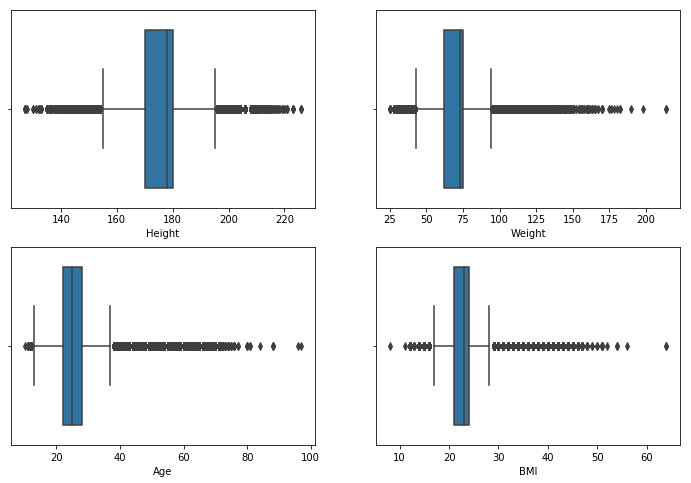

In [58]:
x,y=plt.subplots(2,2,figsize=(12,8))
sns.boxplot(df.Height,ax=y[0,0])
sns.boxplot(df.Weight,ax=y[0,1])
sns.boxplot(df.Age,ax=y[1,0])
sns.boxplot(df.BMI,ax=y[1,1])

In [16]:
#Data Visualization
#Total Number of Participants
len(df.ID.unique())

135571

In [67]:
#Number of participants by Gender
Gender_ratio=pd.DataFrame(df.groupby('Sex')['Name'].nunique())


In [69]:
Gender_ratio

,Name
Sex,
F,33808
M,100979


In [70]:
Gender_ratio=(100. * Gender_ratio / Gender_ratio.sum()).round(0)

In [71]:
Gender_ratio.reset_index(level=0, inplace=True)

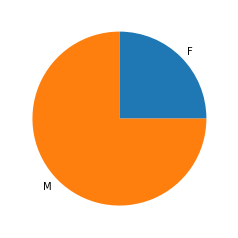

In [73]:
plt.pie(Gender_ratio.Name,labels=Gender_ratio.Sex)
plt.show()

In [204]:
mvf=df[['Year','Name','Sex']]

In [206]:
mvf1 = mvf.groupby(['Year', 'Sex'])['Name'].count().unstack('Sex').fillna(0)

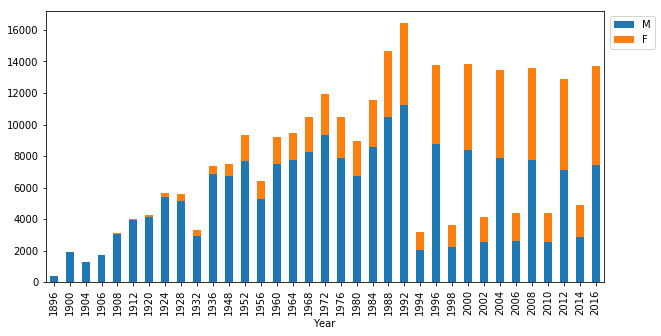

In [166]:

mvf1[['M','F']].plot(kind='bar',stacked=True,figsize=(10,5))
plt.legend(loc='upper right',bbox_to_anchor=(1.1,1))

In [167]:
nat=df[['Year','NOC']]

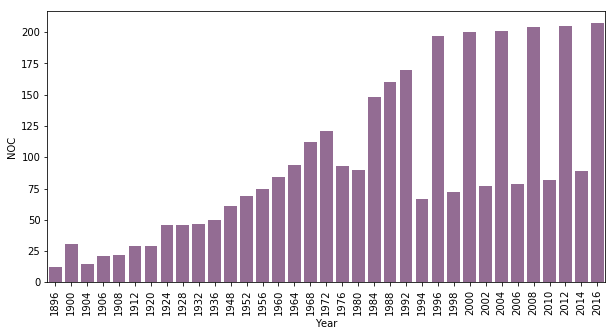

In [199]:
nat1=nat.groupby(['Year'])['NOC'].nunique().reset_index()
plt.figure(figsize=(10,5))
x=sns.barplot(data=nat1,x='Year',y='NOC',color=(0.6, 0.4, 0.6, 0.6))
plt.xticks(rotation='vertical')
plt.show()


In [221]:
gen=df[df['Medal']!='No_medal'][['Sex','Medal','Year']]
mvf1 = mvf.groupby(['Year', 'Sex'])['Name'].count().unstack('Sex').fillna(0)


In [236]:
gen1=gen.groupby(['Year','Sex','Medal'])['Medal'].count().reset_index(name='count')

In [266]:
gen2 = gen.groupby(['Year', 'Sex','Medal'])['Medal'].count().unstack('Sex').fillna(0).reset_index()

In [267]:
gen2.head()

Sex,Year,Medal,F,M
0,1896,Bronze,0.0,38.0
1,1896,Gold,0.0,62.0
2,1896,Silver,0.0,43.0
3,1900,Bronze,5.0,170.0
4,1900,Gold,4.0,197.0


(0, 500)

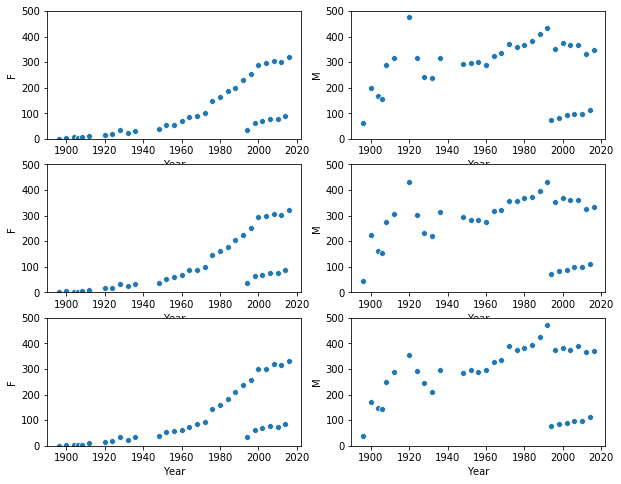

In [310]:
fig,ax=plt.subplots(3,2,figsize=(10,8))
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
sns.scatterplot(data=gen2[gen2.Medal=='Gold'],x='Year',y='F',ax=ax[0,0])
sns.scatterplot(data=gen2[gen2.Medal=='Silver'],x='Year',y='F',ax=ax[1,0])
sns.scatterplot(data=gen2[gen2.Medal=='Bronze'],x='Year',y='F',ax=ax[2,0])
sns.scatterplot(data=gen2[gen2.Medal=='Gold'],x='Year',y='M',ax=ax[0,1])
sns.scatterplot(data=gen2[gen2.Medal=='Silver'],x='Year',y='M',ax=ax[1,1])
sns.scatterplot(data=gen2[gen2.Medal=='Bronze'],x='Year',y='M',ax=ax[2,1])
ax[0,0].set_ylim(0,500)
ax[0,1].set_ylim(0,500)
ax[1,0].set_ylim(0,500)
ax[1,1].set_ylim(0,500)
ax[2,0].set_ylim(0,500)
ax[2,1].set_ylim(0,500)


In [ ]:
sns.lmplot

In [332]:
#ratio1=df[df['Medal']!='No_medal'][['Sex','Medal','Year']]
ratio=df[['Sex','Medal','Year']]

In [333]:
ratio1=ratio.groupby(['Sex','Year'])['Medal'].count().reset_index()

In [340]:
ratio2=ratio[ratio['Medal']!='No_medal'].groupby(['Sex','Year'])['Medal'].count().reset_index()



In [349]:
ratio2.rename(columns={'Medal':'ratio'},inplace=True)

In [351]:
ratio1['ratio']=ratio2['ratio']

In [362]:
ratio1['ratio1']=ratio1['ratio']/ratio1['Medal']*100

In [379]:
ratio1.dtypes

Sex        object
Year        int64
Medal       int64
ratio       int64
ratio1    float64
dtype: object

In [366]:
ratio1['ratio1']=ratio1.ratio1.round()

In [380]:
ratio1['ratio1']=ratio1['ratio1'].astype(int)

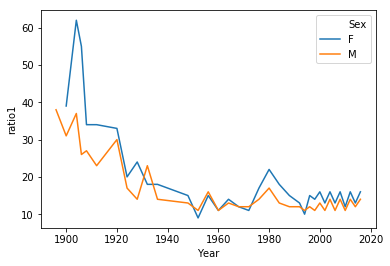

In [382]:
sns.lineplot(data=ratio1,x='Year',y='ratio1',hue='Sex')

In [ ]:
df2=df[df['Medal']!='No_medal']

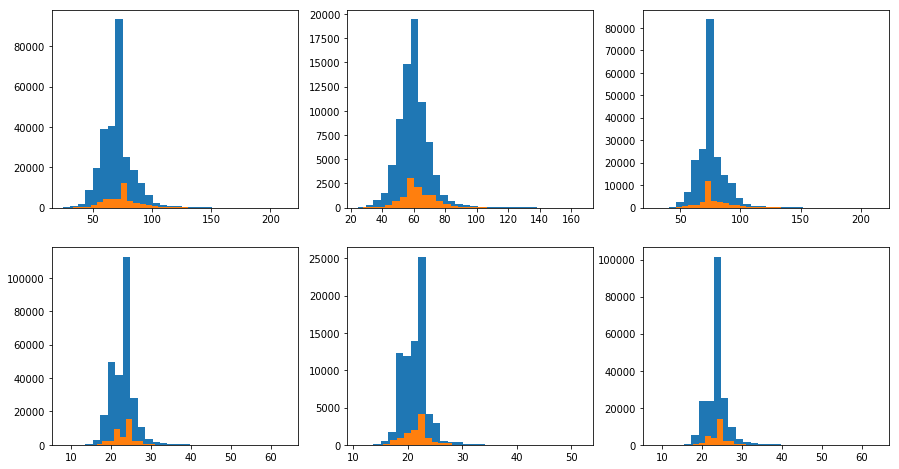

In [469]:
x,y=plt.subplots(2,3,figsize=(15,8))
y[0,0].hist(df.Weight,bins=30)
y[0,1].hist(df[df.Sex=='F'].Weight,bins=30)
y[0,2].hist(df[df.Sex=='M'].Weight,bins=30)
y[0,0].hist(df2.Weight,bins=30)
y[0,1].hist(df2[df2.Sex=='F'].Weight,bins=30)
y[0,2].hist(df2[df2.Sex=='M'].Weight,bins=30)
y[1,0].hist(df.BMI,bins=30)
y[1,1].hist(df[df.Sex=='F'].BMI,bins=30)
y[1,2].hist(df[df.Sex=='M'].BMI,bins=30)
y[1,0].hist(df2.BMI,bins=30)
y[1,1].hist(df2[df2.Sex=='F'].BMI,bins=30)
y[1,2].hist(df2[df2.Sex=='M'].BMI,bins=30)
plt.show()


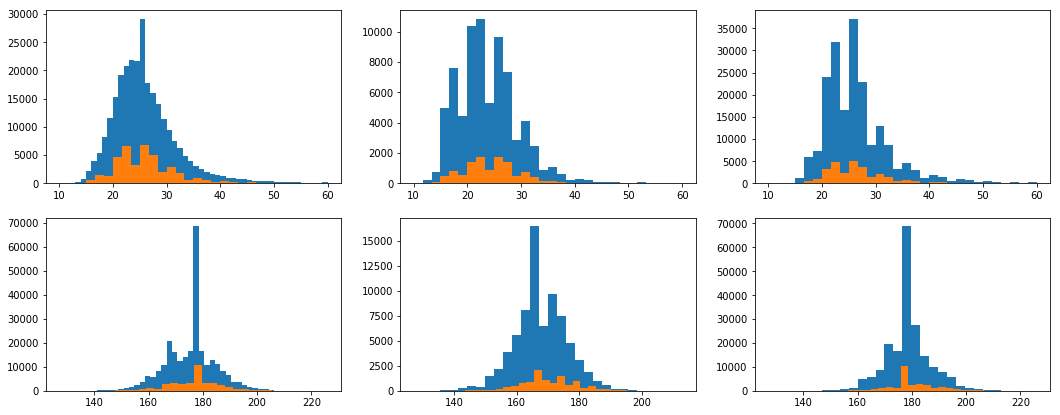

In [460]:
x,y=plt.subplots(2,3,figsize=(18,7))
y[0,0].hist(df.Age,bins=50,range=(10,60))
y[0,1].hist(df[df.Sex=='F'].Age,bins=30,range=(10,60))
y[0,2].hist(df[df.Sex=='M'].Age,bins=30,range=(10,60))
y[0,0].hist(df2.Age,bins=30,range=(10,60))
y[0,1].hist(df2[df2.Sex=='F'].Age,bins=30,range=(10,60))
y[0,2].hist(df2[df2.Sex=='M'].Age,bins=30,range=(10,60))
y[1,0].hist(df.Height,bins=50)
y[1,1].hist(df[df.Sex=='F'].Height,bins=30)
y[1,2].hist(df[df.Sex=='M'].Height,bins=30)
y[1,0].hist(df2.Height,bins=30)
y[1,1].hist(df2[df2.Sex=='F'].Height,bins=30)
y[1,2].hist(df2[df2.Sex=='M'].Height,bins=30)
plt.show()

In [ ]:
df3=df[df['']]


In [481]:
df3=df[df['Medal']!='No_medal'][['Name','Medal','Sport','Year']]

In [480]:
len(df.Sport.unique())

66

In [595]:
df4=df3.groupby(['Name','Sport'])['Medal'].count().reset_index().sort_values('Medal',ascending=False)

In [602]:
df5=df4.groupby(['Sport'])['Medal'].max().reset_index().sort_values('Medal',ascending=False)
    

In [603]:
df5.head()

,Sport,Medal
54,Swimming,28
27,Gymnastics,18
11,Biathlon,13
22,Fencing,13
14,Canoeing,12


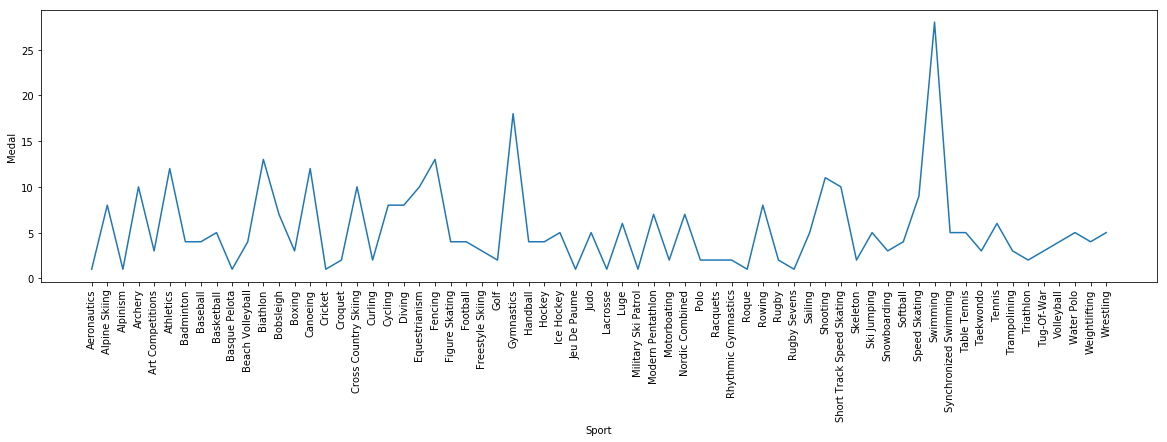

In [608]:
plt.figure(figsize=(20,5))
sns.lineplot(data=df5,x='Sport',y='Medal')
plt.xticks(rotation='vertical')
plt.show()

In [609]:
noc=df[df['Medal']!='No_medal'][['NOC','Medal','Sport']]

In [626]:
noc1=noc.groupby(['NOC','Sport'])['Medal'].count().reset_index().sort_values('Medal',ascending=False)

In [624]:
noc2=noc1.groupby(['Sport'])['Medal'].max().reset_index().sort_values('Medal',ascending=False)

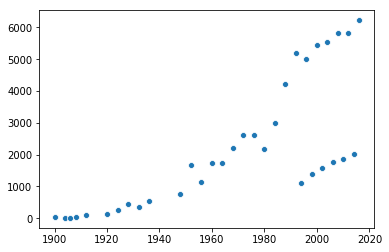

In [65]:
female = df[df.Sex=='F']
year_count = female.groupby('Year').agg('count')
years = list(year_count.index)
counts =  list(year_count.Name)
sns.scatterplot(x = years, y = counts)

In [66]:
unique_women = len(df[df.Sex=='F'].Name.unique())
unique_men = len(df[df.Sex=='M'].Name.unique())
women_medals = df[df.Sex=='F'].Medal.count()
men_medals = df[df.Sex=='M'].Medal.count()

print("{} {} {} {} ".format(unique_women, unique_men, women_medals, men_medals ))

df[df.Sex=='F'].Year.min()

33808 100979 74522 196594 


1900

C:\Users\rameshsrujana\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(<matplotlib.axes._subplots.AxesSubplot at 0x755bdc8208>,
 <matplotlib.axes._subplots.AxesSubplot at 0x755bdc8208>)

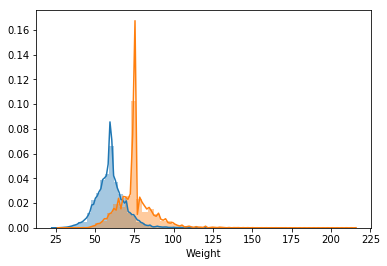

In [74]:
(sns.distplot(df[df.Sex=='F'].Weight.dropna()),
sns.distplot(df[df.Sex=='M'].Weight.dropna())
)

In [77]:
df['Height'].shape[0]

271116

In [78]:
team_medal_count = df.groupby(['Team','Medal']).Medal.agg('count')
team_medal_count = team_medal_count.reset_index(name='count').sort_values(['count'], ascending=False)
team_medal_count.head(10)

,Team,Medal,count
1589,United States,No_medal,12628
525,France,No_medal,10438
602,Great Britain,No_medal,9731
753,Italy,No_medal,8733
247,Canada,No_medal,8036
771,Japan,No_medal,7378
576,Germany,No_medal,7342
1444,Sweden,No_medal,6618
85,Australia,No_medal,6207
1167,Poland,No_medal,5580


In [79]:
def get_country_stats(country):
    return team_medal_count[team_medal_count.Team==country]

In [80]:
get_country_stats('Chile')

,Team,Medal,count
279,Chile,No_medal,892
277,Chile,Bronze,20
280,Chile,Silver,9
278,Chile,Gold,3


In [81]:
df[df.Team=='Croatia'].Year.unique()


array([2006, 1996, 2000, 1992, 2008, 2012, 2004, 2016, 2014, 2010, 2002,
       1998, 1994], dtype=int64)

In [82]:
import pandas as pd
import seaborn as sns

df = pd.read_csv('athlete_events.csv')
df.shape
In [ ]:
list(df)
In [ ]:
(sns.distplot(df[df.Sex=='F'].Weight.dropna()),
sns.distplot(df[df.Sex=='M'].Weight.dropna())
)
In [ ]:
(sns.distplot(df[df.Sex=='F'][ df.Sport=='Swimming'].Height.dropna()),
sns.distplot(df[df.Sex=='M'][df.Sport=='Swimming'].Height.dropna())
)
In [ ]:
def NaN_percent(df, column_name):
    row_count = df[column_name].shape[0]
    empty_values = row_count - df[column_name].count()
    return (100.0*empty_values)/row_count
In [ ]:
NaN_percent(df, 'Height')
In [ ]:
for i in list(df):
    print(i +': ' + str(NaN_percent(df,i))+'%')
In [ ]:
total_rows = df.shape[0]
unique_athletes = len(df.Name.unique())
medal_winners = len(df[df.Medal.fillna('None')!='None'].Name.unique())

"{0} {1} {2}".format(total_rows, unique_athletes, medal_winners)
In [ ]:
print(df[df.Medal.fillna('None')!='None'].Medal.value_counts())
df[df.Medal.fillna('None')!='None'].shape[0]
In [ ]:
team_medal_count = df.groupby(['Team','Medal']).Medal.agg('count')
team_medal_count = team_medal_count.reset_index(name='count').sort_values(['count'], ascending=False)
team_medal_count.head(10)
In [ ]:
def get_country_stats(country):
    return team_medal_count[team_medal_count.Team==country]
In [ ]:
get_country_stats('Chile')
In [ ]:
df[df.Team=='Croatia'].Year.unique()
In [ ]:
unique_women = len(df[df.Sex=='F'].Name.unique())
unique_men = len(df[df.Sex=='M'].Name.unique())
women_medals = df[df.Sex=='F'].Medal.count()
men_medals = df[df.Sex=='M'].Medal.count()

print("{} {} {} {} ".format(unique_women, unique_men, women_medals, men_medals ))

df[df.Sex=='F'].Year.min()
In [ ]:
female = df[df.Sex=='F']
year_count = female.groupby('Year').agg('count')
years = list(year_count.index)
counts =  list(year_count.Name)
sns.scatterplot(x = years, y = counts)
In [ ]:
f_year_count = df[df.Sex=='F'].groupby('Year').agg('count').Name
m_year_count = df[df.Sex=='M'].groupby('Year').agg('count').Name
(sns.scatterplot(data= m_year_count),
 sns.scatterplot(data =f_year_count))
In [ ]:
df.Sport.value_counts()



SyntaxError: invalid syntax (<ipython-input-82-901a3a845e64>, line 6)